# Absolute Orientation of Two 3D Point Sets

## Goal

Given two 3D point sets $P$ and $Q$ as $3{\times}N$ matrices, the absolute orientation is a problem that finds rotation $R$, translation $t$, and scale $s$ satisfying
\begin{equation}
Q = s R P + t .
\end{equation}

Here, each corresponding columns of $P$ and $Q$ are assumed to be a corresponding point pair in 3D.

* Input
  * $P$, $Q$
* Output
  * $R, t, s$


## References
* Umeyama. Least-squares estimation of transformation parameters between two point patterns, PAMI 1991
* Horn. Closed-form solution of absolute orientation using unit quaternions, JOSA 1987


## Libraries

In [1]:
%matplotlib notebook
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pycalib.calib import absolute_orientation


## Synthetic data

<IPython.core.display.Javascript object>


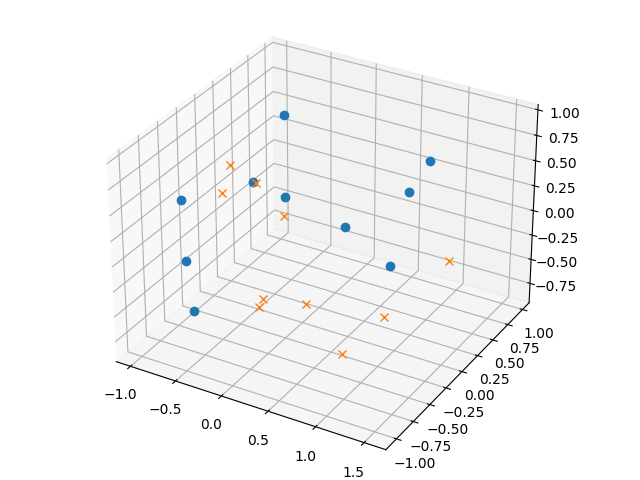

In [14]:
N = 10
P = np.random.uniform(-1, 1, (3, N))
R, _ = cv2.Rodrigues(np.random.normal(0, 1, 3))
t = np.random.uniform(-1, 1, 3)
s = np.random.uniform(0, 1, 1)
Q = s * (R @ P) + t[:, None]

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(P[0,:], P[1,:], P[2,:], 'o')
ax.plot(Q[0,:], Q[1,:], Q[2,:], 'x')
fig.show()

## Absolute Orientation (no noise)

<IPython.core.display.Javascript object>


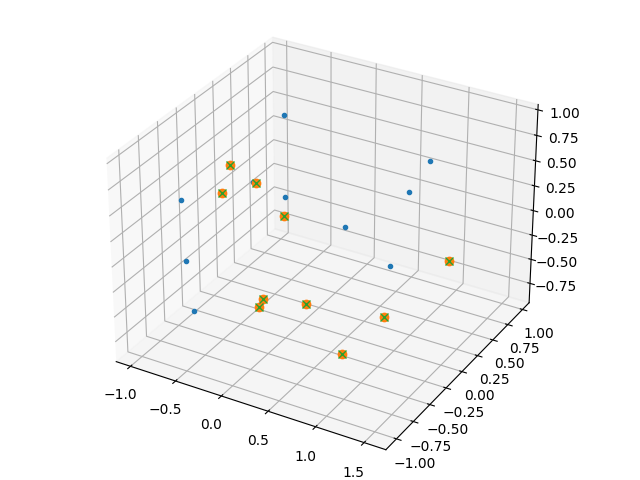

E_r =  4.2276033262255756e-16
E_t =  1.6653345369377348e-16
E_s =  3.3306690738754696e-16
E_3d =  4.566935768027366e-16


In [15]:
R2, t2, s2 = absolute_orientation(P, Q)

P2 = s2 * (R2 @ P) + t2[:, None]

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot(P[0,:], P[1,:], P[2,:], '.')
ax.plot(P2[0,:], P2[1,:], P2[2,:], 'o')
ax.plot(Q[0,:], Q[1,:], Q[2,:], 'x')
fig.show()

assert np.allclose(R, R2)
assert np.allclose(t, t2)
assert np.allclose(s, s2)

print('E_r = ', np.linalg.norm(R - R2))
print('E_t = ', np.linalg.norm(t - t2))
print('E_s = ', np.linalg.norm(s - s2))
print('E_3d = ', np.mean(np.linalg.norm(Q - P2, axis=0)))

# Absolute Orientation (with noise)

<IPython.core.display.Javascript object>


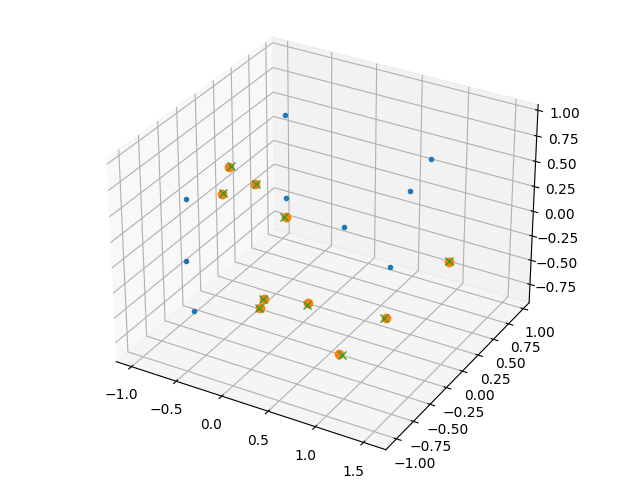

Noise = Gaussian of sigma=0.01
E_r =  0.009266231434368624
E_t =  0.004685778466556469
E_s =  0.001023086519704064
E_3d =  0.01439639595497518


In [26]:
# inject noise to P (originally in [-1:1])
sigma = 0.01
Pd = P + np.random.normal(0, sigma, P.shape)

R2, t2, s2 = absolute_orientation(Pd, Q)

P2 = s2 * (R2 @ Pd) + t2[:, None]

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot(Pd[0,:], Pd[1,:], Pd[2,:], '.')
ax.plot(P2[0,:], P2[1,:], P2[2,:], 'o')
ax.plot(Q[0,:], Q[1,:], Q[2,:], 'x')
fig.show()

print(f'Noise = Gaussian of sigma={sigma}')
print('E_r = ', np.linalg.norm(R - R2))
print('E_t = ', np.linalg.norm(t - t2))
print('E_s = ', np.linalg.norm(s - s2))
print('E_3d = ', np.mean(np.linalg.norm(Q - P2, axis=0)))
